# 搭建神经网络进行气温预测

## 回归问题预测
- Tensorflow2版本中将大量使用keras的简洁建模方法

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
features = pd.read_csv('temps.csv')

# 看看数据长什么样子
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


### 数据表说明
* year,moth,day,week分别表示的具体的时间
* temp_2：前天的最高温度值
* temp_1：昨天的最高温度值
* average：在历史中，每年这一天的平均最高温度值
* actual：这就是我们的标签值了，当天的真实最高温度
* friend：这一列可能是凑热闹的，你的朋友猜测的可能值，咱们不管它就好了

In [3]:
print('数据维度:', features.shape)

数据维度: (348, 9)


In [4]:
# 处理时间数据
import datetime

# 分别得到年，月，日
years = features['year']
months = features['month']
days = features['day']

# datetime格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [5]:
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

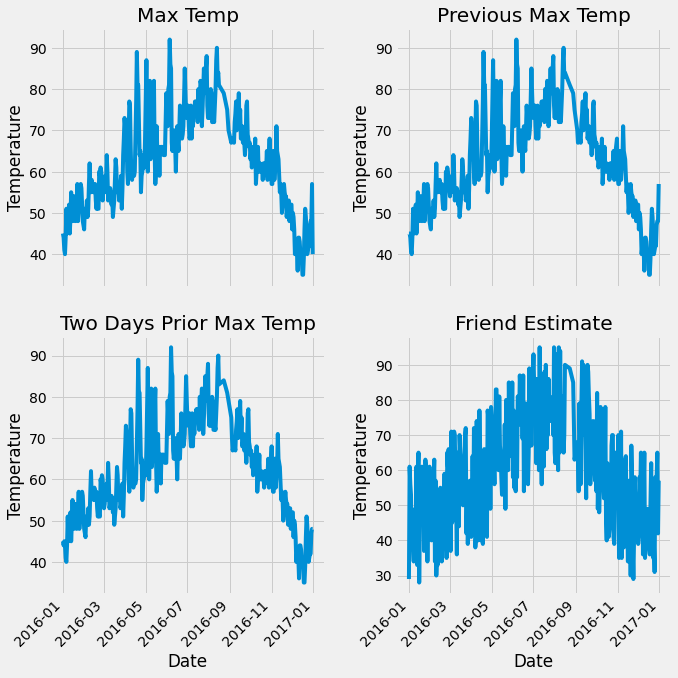

In [6]:
# 准备画图
# 指定默认风格
plt.style.use('fivethirtyeight')

# 设置布局
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# 标签值
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# 昨天
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# 前天
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# 我的朋友
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [7]:
# 独热编码
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [8]:
# 标签
labels = np.array(features['actual'])

# 在特征中去掉标签
features= features.drop('actual', axis = 1)

# 名字单独保存一下，以备后患
feature_list = list(features.columns)

# 转换成合适的格式
features = np.array(features)

In [9]:
features.shape

(348, 14)

In [10]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

In [11]:
input_features[0]

array([ 0.        , -1.5678393 , -1.65682171, -1.48452388, -1.49443549,
       -1.3470703 , -1.98891668,  2.44131112, -0.40482045, -0.40961596,
       -0.40482045, -0.40482045, -0.41913682, -0.40482045])

## 基于Keras构建网络模型

一些常用参数已经列出，如下所示：

- activation：激活函数的选择，一般常用relu
- kernel_initializer,bias_initializer：权重与偏置参数的初始化方法，有时候不收敛换种初始化就突然好使了。。。玄学
- kernel_regularizer，bias_regularizer：要不要加入正则化，
- inputs：输入，可以自己指定，也可以让网络自动选
- units：神经元个数

### 按顺序构造网络模型

In [12]:
model = tf.keras.Sequential()
model.add(layers.Dense(16))
model.add(layers.Dense(32))
model.add(layers.Dense(1))

### compile相当于对网络进行配置，指定好优化器和损失函数等

In [13]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error')

In [14]:
model.fit(input_features, labels, validation_split=0.25, epochs=10, batch_size=64)

Epoch 1/10
5/5 [==============================] - 0s 24ms/step - loss: 4250.7407 - val_loss: 3190.7722
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 1949.6639 - val_loss: 3769.4749
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 133.0157 - val_loss: 2237.9556
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 151.8830 - val_loss: 1745.0427
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 72.6130 - val_loss: 1196.3461
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 63.2490 - val_loss: 886.8547
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 47.1692 - val_loss: 880.7474
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 70.7081 - val_loss: 597.1439
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 46.4062 - val_loss: 634.3498
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 59.1993 - val_loss: 499.89

In [15]:
input_features.shape

(348, 14)

### 似乎存在一些问题，模型还没有完全收敛，能不能调些参数呢

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


## 更改初始化方法后

In [17]:
model = tf.keras.Sequential()
model.add(layers.Dense(16,kernel_initializer='random_normal'))
model.add(layers.Dense(32,kernel_initializer='random_normal'))
model.add(layers.Dense(1,kernel_initializer='random_normal'))

In [18]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error')
model.fit(input_features, labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 0s 18ms/step - loss: 4389.2275 - val_loss: 2868.7166
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 4288.4639 - val_loss: 2780.1021
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 4150.6606 - val_loss: 2648.6716
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 3784.9058 - val_loss: 2475.6768
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 1418.9622 - val_loss: 2320.0420
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 85.3802 - val_loss: 1637.6143
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 62.1261 - val_loss: 1254.9003
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 48.4438 - val_loss: 907.7795
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 38.9194 - val_loss: 824.5661
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 75.1072 - 

## 加入正则化惩罚项

In [19]:
model = tf.keras.Sequential()
model.add(layers.Dense(16,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(layers.Dense(32,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(layers.Dense(1,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error')
model.fit(input_features, labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 0s 21ms/step - loss: 4390.3818 - val_loss: 2870.9739
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 4295.6743 - val_loss: 2788.5601
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 4177.5166 - val_loss: 2678.1348
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 3960.3782 - val_loss: 2484.9258
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 2944.1274 - val_loss: 3631.2563
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 249.0989 - val_loss: 1581.5094
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 69.9898 - val_loss: 1314.5250
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 65.2161 - val_loss: 1018.7784
Epoch 9/100
5/5 [==============================] - 0s 8ms/step - loss: 58.6896 - val_loss: 860.9908
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.4353 

## 预测模型结果

In [20]:
predict = model.predict(input_features)

In [21]:
predict.shape

(348, 1)

## 测试结果并进行展示

In [22]:
# 转换日期格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# 创建一个表格来存日期和其对应的标签数值
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# 同理，再创建一个来存日期和其对应的模型预测值
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predict.reshape(-1)}) 

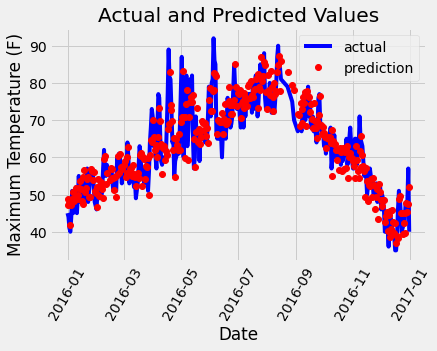

In [23]:
# 真实值
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# 预测值
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# 图名
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');
